In [42]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, GRU
import seaborn as sns
import sklearn as sks
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import joblib
from datetime import datetime, timedelta
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import datetime

In [43]:

model = load_model('1hour_close_FNG.h5')
sc = joblib.load('scaler1hour.pkl')

In [44]:

client = Client('dmjW0ITi9h77eMWmpVtHZRlkJZW8Pe752YcHIWOoK87AWz8Z3gV19kZ8tTnfHHcr', 'CVKE78zOoQDDqYuovQiyOVZbtf2GlgKD4jqCl3LymVXFb93Sw7FYvitOjudyThbz', tld='us')
# Calculate the start date
from datetime import datetime, timedelta

# Calculate the start date
end_date = datetime.now()
start_date = end_date - timedelta(days=5)

# Convert start and end dates to string format
start_date_str = start_date.strftime("%d %b, %Y")
end_date_str = end_date.strftime("%d %b, %Y")

# Retrieve the historical data
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1HOUR, start_date_str, end_date_str)

df = pd.DataFrame(klines)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
116,1687464000000,1890.28000000,1890.48000000,1880.39000000,1886.03000000,80.39670000,1687467599999,151464.62951000,647,20.60720000,38847.66205500,0
117,1687467600000,1886.22000000,1889.34000000,1876.44000000,1878.91000000,110.44680000,1687471199999,207989.65490900,593,35.88660000,67610.02422300,0
118,1687471200000,1878.93000000,1880.72000000,1868.87000000,1871.83000000,64.99980000,1687474799999,121968.47682400,354,8.41760000,15816.72419500,0
119,1687474800000,1869.12000000,1875.91000000,1868.60000000,1870.38000000,30.42930000,1687478399999,56945.49290100,104,2.51500000,4710.93181600,0
120,1687478400000,1870.40000000,1879.91000000,1870.37000000,1877.89000000,45.01280000,1687481999999,84409.85513400,231,21.70290000,40726.71330800,0


In [45]:
url = "https://api.alternative.me/fng/?limit=900&format=csv&date_format=us"

params = {
    "limit": 5,
    "format": "json",
    "date_format": "us"
}

response = requests.get(url, params=params)
data = response.json()

df_data = []
for d in data["data"]:
    fng_value = d["value"]
    fng_classification = d["value_classification"]
    date = d["timestamp"]
    df_data.append([date, fng_value, fng_classification])

df2 = pd.DataFrame(df_data, columns=["Date", "FNG Value", "FNG Classification"])
print(df2)

         Date FNG Value FNG Classification
0  06-23-2023        65              Greed
1  06-22-2023        65              Greed
2  06-21-2023        59              Greed
3  06-20-2023        49            Neutral
4  06-19-2023        47            Neutral


In [46]:

df2['Date'] = pd.to_datetime(df2['Date'], format='%m-%d-%Y').dt.strftime('%Y-%m-%d')
df2 = df2.iloc[::-1]

In [47]:

ethdf = df

In [48]:

ethdf.rename(columns={0:'open_time', 1:'open', 2:'high', 3:'low', 4:'close', 5:'volume', 6:'close_time', 7:'quote_asset_volume', 8:'number_of_trades', 9:'taker_buy_base_asset_volume', 10:'taker_buy_quote_asset_volume', 11:'ignore'}, inplace=True)

ethdf.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1687046400000,1727.50000000,1729.34000000,1721.51000000,1723.48000000,27.88410000,1687049999999,48101.06156800,164,6.09290000,10518.71326800,0
1,1687050000000,1723.56000000,1727.46000000,1723.51000000,1725.81000000,30.65270000,1687053599999,52864.85960800,91,4.86090000,8388.42768200,0
2,1687053600000,1727.46000000,1728.29000000,1724.35000000,1724.80000000,5.16670000,1687057199999,8917.13597600,40,1.42260000,2458.17412400,0
3,1687057200000,1724.22000000,1729.34000000,1724.05000000,1728.81000000,3.57540000,1687060799999,6175.29238200,40,2.23760000,3866.39490200,0
4,1687060800000,1728.03000000,1730.66000000,1726.57000000,1728.23000000,4.76850000,1687064399999,8243.57241200,37,2.04540000,3537.28098900,0


In [49]:

ethdf['date'] = pd.to_datetime(ethdf['open_time'], unit='ms')

ethdf.rename(columns = {'date':'datetime'}, inplace = True)
ehtdf = ethdf.sort_values(by='datetime')

ethdf.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,datetime
0,1687046400000,1727.50000000,1729.34000000,1721.51000000,1723.48000000,27.88410000,1687049999999,48101.06156800,164,6.09290000,10518.71326800,0,2023-06-18 00:00:00
1,1687050000000,1723.56000000,1727.46000000,1723.51000000,1725.81000000,30.65270000,1687053599999,52864.85960800,91,4.86090000,8388.42768200,0,2023-06-18 01:00:00
2,1687053600000,1727.46000000,1728.29000000,1724.35000000,1724.80000000,5.16670000,1687057199999,8917.13597600,40,1.42260000,2458.17412400,0,2023-06-18 02:00:00
3,1687057200000,1724.22000000,1729.34000000,1724.05000000,1728.81000000,3.57540000,1687060799999,6175.29238200,40,2.23760000,3866.39490200,0,2023-06-18 03:00:00
4,1687060800000,1728.03000000,1730.66000000,1726.57000000,1728.23000000,4.76850000,1687064399999,8243.57241200,37,2.04540000,3537.28098900,0,2023-06-18 04:00:00


In [50]:

ethdf['Date'] = pd.to_datetime(ethdf['datetime']).dt.date

ethdf.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,datetime,Date
0,1687046400000,1727.50000000,1729.34000000,1721.51000000,1723.48000000,27.88410000,1687049999999,48101.06156800,164,6.09290000,10518.71326800,0,2023-06-18 00:00:00,2023-06-18
1,1687050000000,1723.56000000,1727.46000000,1723.51000000,1725.81000000,30.65270000,1687053599999,52864.85960800,91,4.86090000,8388.42768200,0,2023-06-18 01:00:00,2023-06-18
2,1687053600000,1727.46000000,1728.29000000,1724.35000000,1724.80000000,5.16670000,1687057199999,8917.13597600,40,1.42260000,2458.17412400,0,2023-06-18 02:00:00,2023-06-18
3,1687057200000,1724.22000000,1729.34000000,1724.05000000,1728.81000000,3.57540000,1687060799999,6175.29238200,40,2.23760000,3866.39490200,0,2023-06-18 03:00:00,2023-06-18
4,1687060800000,1728.03000000,1730.66000000,1726.57000000,1728.23000000,4.76850000,1687064399999,8243.57241200,37,2.04540000,3537.28098900,0,2023-06-18 04:00:00,2023-06-18


In [51]:

dataset = ethdf[[ 'datetime', 'Date', 'open','low','high','close']].copy()
# Target feature
y_target = 'Close'
dataset.head(100)

,datetime,Date,open,low,high,close
0,2023-06-18 00:00:00,2023-06-18,1727.50000000,1721.51000000,1729.34000000,1723.48000000
1,2023-06-18 01:00:00,2023-06-18,1723.56000000,1723.51000000,1727.46000000,1725.81000000
2,2023-06-18 02:00:00,2023-06-18,1727.46000000,1724.35000000,1728.29000000,1724.80000000
3,2023-06-18 03:00:00,2023-06-18,1724.22000000,1724.05000000,1729.34000000,1728.81000000
4,2023-06-18 04:00:00,2023-06-18,1728.03000000,1726.57000000,1730.66000000,1728.23000000
5,2023-06-18 05:00:00,2023-06-18,1729.15000000,1728.68000000,1737.46000000,1729.16000000
6,2023-06-18 06:00:00,2023-06-18,1727.90000000,1723.50000000,1730.94000000,1728.30000000
7,2023-06-18 07:00:00,2023-06-18,1727.60000000,1727.60000000,1733.20000000,1729.52000000
8,2023-06-18 08:00:00,2023-06-18,1731.39000000,1726.64000000,1731.39000000,1728.27000000
9,2023-06-18 09:00:00,2023-06-18,1727.66000000,1727.21000000,1732.87000000,1731.85000000


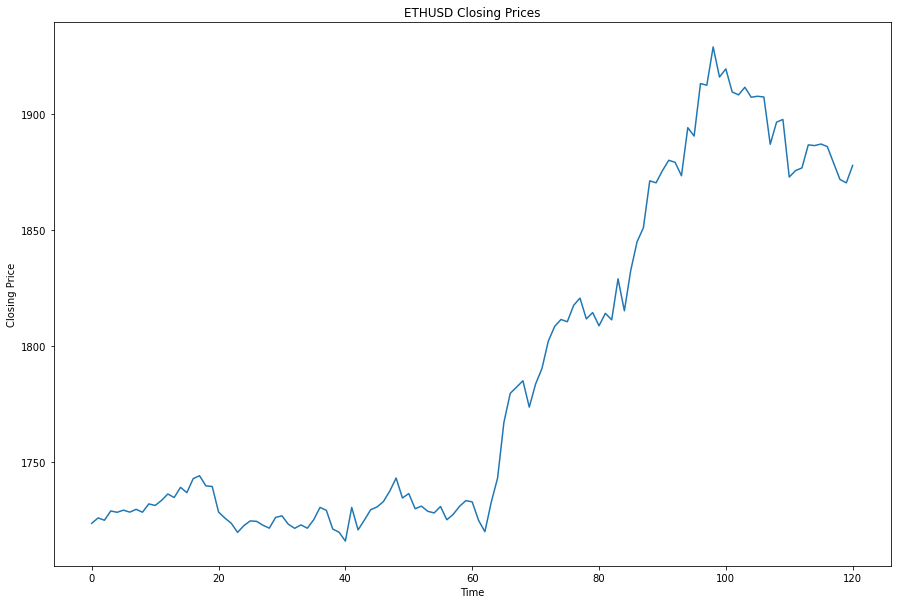

In [52]:

# Extract the closing prices from the DataFrame
closing_prices = dataset['close'].astype(float)  # Assuming the column name for closing price is 'close'
plt.figure(figsize=(15, 10))
# Create a line plot
plt.plot(closing_prices)
plt.title("ETHUSD Closing Prices")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.show()

In [53]:
dataset.head()

,datetime,Date,open,low,high,close
0,2023-06-18 00:00:00,2023-06-18,1727.50000000,1721.51000000,1729.34000000,1723.48000000
1,2023-06-18 01:00:00,2023-06-18,1723.56000000,1723.51000000,1727.46000000,1725.81000000
2,2023-06-18 02:00:00,2023-06-18,1727.46000000,1724.35000000,1728.29000000,1724.80000000
3,2023-06-18 03:00:00,2023-06-18,1724.22000000,1724.05000000,1729.34000000,1728.81000000
4,2023-06-18 04:00:00,2023-06-18,1728.03000000,1726.57000000,1730.66000000,1728.23000000


In [54]:
dataset.tail()

,datetime,Date,open,low,high,close
116,2023-06-22 20:00:00,2023-06-22,1890.28000000,1880.39000000,1890.48000000,1886.03000000
117,2023-06-22 21:00:00,2023-06-22,1886.22000000,1876.44000000,1889.34000000,1878.91000000
118,2023-06-22 22:00:00,2023-06-22,1878.93000000,1868.87000000,1880.72000000,1871.83000000
119,2023-06-22 23:00:00,2023-06-22,1869.12000000,1868.60000000,1875.91000000,1870.38000000
120,2023-06-23 00:00:00,2023-06-23,1870.40000000,1870.37000000,1879.91000000,1877.89000000


In [55]:
# Set display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Print the entire dataset
print(df)

         open_time           open           high            low  \
0    1687046400000  1727.50000000  1729.34000000  1721.51000000   
1    1687050000000  1723.56000000  1727.46000000  1723.51000000   
2    1687053600000  1727.46000000  1728.29000000  1724.35000000   
3    1687057200000  1724.22000000  1729.34000000  1724.05000000   
4    1687060800000  1728.03000000  1730.66000000  1726.57000000   
5    1687064400000  1729.15000000  1737.46000000  1728.68000000   
6    1687068000000  1727.90000000  1730.94000000  1723.50000000   
7    1687071600000  1727.60000000  1733.20000000  1727.60000000   
8    1687075200000  1731.39000000  1731.39000000  1726.64000000   
9    1687078800000  1727.66000000  1732.87000000  1727.21000000   
10   1687082400000  1733.31000000  1733.31000000  1730.35000000   
11   1687086000000  1730.47000000  1733.35000000  1730.47000000   
12   1687089600000  1733.66000000  1736.80000000  1729.75000000   
13   1687093200000  1736.54000000  1738.69000000  1734.0700000

In [56]:

del ethdf['open_time']

ethdf.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,datetime,Date
0,1727.50000000,1729.34000000,1721.51000000,1723.48000000,27.88410000,1687049999999,48101.06156800,164,6.09290000,10518.71326800,0,2023-06-18 00:00:00,2023-06-18
1,1723.56000000,1727.46000000,1723.51000000,1725.81000000,30.65270000,1687053599999,52864.85960800,91,4.86090000,8388.42768200,0,2023-06-18 01:00:00,2023-06-18
2,1727.46000000,1728.29000000,1724.35000000,1724.80000000,5.16670000,1687057199999,8917.13597600,40,1.42260000,2458.17412400,0,2023-06-18 02:00:00,2023-06-18
3,1724.22000000,1729.34000000,1724.05000000,1728.81000000,3.57540000,1687060799999,6175.29238200,40,2.23760000,3866.39490200,0,2023-06-18 03:00:00,2023-06-18
4,1728.03000000,1730.66000000,1726.57000000,1728.23000000,4.76850000,1687064399999,8243.57241200,37,2.04540000,3537.28098900,0,2023-06-18 04:00:00,2023-06-18


In [57]:

dataset = ethdf[[ 'datetime', 'Date', 'open','low','high','close']].copy()
# Target feature
y_target = 'Close'
dataset.head()

,datetime,Date,open,low,high,close
0,2023-06-18 00:00:00,2023-06-18,1727.50000000,1721.51000000,1729.34000000,1723.48000000
1,2023-06-18 01:00:00,2023-06-18,1723.56000000,1723.51000000,1727.46000000,1725.81000000
2,2023-06-18 02:00:00,2023-06-18,1727.46000000,1724.35000000,1728.29000000,1724.80000000
3,2023-06-18 03:00:00,2023-06-18,1724.22000000,1724.05000000,1729.34000000,1728.81000000
4,2023-06-18 04:00:00,2023-06-18,1728.03000000,1726.57000000,1730.66000000,1728.23000000


In [58]:

df2['Date'] = pd.to_datetime(df2['Date']).dt.date.astype(str)

In [59]:

dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date.astype(str)

In [60]:

df_combined = pd.merge(dataset, df2, on='Date')

In [61]:
df_combined.head()

,datetime,Date,open,low,high,close,FNG Value,FNG Classification
0,2023-06-19 00:00:00,2023-06-19,1720.01000000,1715.63000000,1725.04000000,1722.52000000,47,Neutral
1,2023-06-19 01:00:00,2023-06-19,1721.29000000,1720.39000000,1726.08000000,1724.52000000,47,Neutral
2,2023-06-19 02:00:00,2023-06-19,1725.69000000,1724.06000000,1727.39000000,1724.32000000,47,Neutral
3,2023-06-19 03:00:00,2023-06-19,1724.40000000,1721.51000000,1726.82000000,1722.65000000,47,Neutral
4,2023-06-19 04:00:00,2023-06-19,1722.60000000,1720.51000000,1726.36000000,1721.39000000,47,Neutral


In [62]:
df_combined.tail()

,datetime,Date,open,low,high,close,FNG Value,FNG Classification
92,2023-06-22 20:00:00,2023-06-22,1890.28000000,1880.39000000,1890.48000000,1886.03000000,65,Greed
93,2023-06-22 21:00:00,2023-06-22,1886.22000000,1876.44000000,1889.34000000,1878.91000000,65,Greed
94,2023-06-22 22:00:00,2023-06-22,1878.93000000,1868.87000000,1880.72000000,1871.83000000,65,Greed
95,2023-06-22 23:00:00,2023-06-22,1869.12000000,1868.60000000,1875.91000000,1870.38000000,65,Greed
96,2023-06-23 00:00:00,2023-06-23,1870.40000000,1870.37000000,1879.91000000,1877.89000000,65,Greed


In [63]:

df_combined.drop('FNG Classification', axis=1, inplace=True)

In [64]:

df_combined.set_index('datetime', inplace=True)


In [65]:

df_combined.drop('Date', axis=1, inplace=True)

In [66]:

df_combined.rename(columns={'FNG Value': 'FNG'}, inplace=True)

In [67]:

df_combined = df_combined.astype(float)

In [68]:
df_combined.dtypes

open     float64
low      float64
high     float64
close    float64
FNG      float64
dtype: object

In [69]:
df_combined.tail()

,open,low,high,close,FNG
datetime,,,,,
2023-06-22 20:00:00,1890.28,1880.39,1890.48,1886.03,65.0
2023-06-22 21:00:00,1886.22,1876.44,1889.34,1878.91,65.0
2023-06-22 22:00:00,1878.93,1868.87,1880.72,1871.83,65.0
2023-06-22 23:00:00,1869.12,1868.60,1875.91,1870.38,65.0
2023-06-23 00:00:00,1870.40,1870.37,1879.91,1877.89,65.0


In [70]:
n_time_steps = 24 # Number of time steps in a window

windows = []
target = []

data = df_combined[['low', 'high', 'open', 'close']]  # Include all relevant columns

print("Length of data:", len(data))



Length of data: 97


In [71]:
# Calculate the start index for the past month
start_index = len(data) - ( 1 + n_time_steps)

for i in range(start_index, len(data) - n_time_steps):
    x = data.iloc[i:i+n_time_steps]
    y = data.iloc[i+n_time_steps]
    windows.append(x)
    target.append(y)

# Convert to numpy arrays
windows = np.array(windows)
target = np.array(target)

print("Length of windows:", len(windows))

Length of windows: 1


In [72]:
print("Windows:", windows)
print("Target:", target)

Windows: [[[1884.7  1919.67 1888.59 1913.21]
  [1910.79 1924.31 1914.51 1912.5 ]
  [1909.92 1931.99 1912.94 1929.03]
  [1915.98 1931.38 1931.36 1916.03]
  [1910.29 1919.84 1916.32 1919.54]
  [1909.13 1917.41 1917.28 1909.6 ]
  [1902.32 1910.83 1909.85 1908.33]
  [1905.19 1911.87 1911.06 1911.62]
  [1904.15 1912.42 1911.58 1907.33]
  [1905.13 1911.39 1907.29 1907.74]
  [1904.6  1911.39 1906.78 1907.41]
  [1884.35 1907.14 1907.13 1887.02]
  [1887.02 1898.82 1887.02 1896.56]
  [1894.93 1908.09 1896.6  1897.72]
  [1866.73 1901.02 1896.79 1872.88]
  [1870.3  1879.32 1870.98 1875.68]
  [1875.02 1891.26 1878.07 1876.81]
  [1877.16 1889.64 1880.22 1886.76]
  [1880.38 1891.26 1889.72 1886.45]
  [1883.16 1889.77 1885.65 1887.13]
  [1880.39 1890.48 1890.28 1886.03]
  [1876.44 1889.34 1886.22 1878.91]
  [1868.87 1880.72 1878.93 1871.83]
  [1868.6  1875.91 1869.12 1870.38]]]
Target: [[1870.37 1879.91 1870.4  1877.89]]


In [73]:

# Initialize the last window
last_window = windows[-1].reshape(1, n_time_steps, 4) # Use the last window as is

# Scale the last window
last_window_2d = last_window.reshape(-1, 4)  # Reshape to 2D array
last_window_scaled = sc.transform(last_window_2d)  # Scale the data

# Create an empty list to store the predicted values
predictions = []

# Generate predictions recursively for 24 timesteps in the future
for i in range(96):
    # Reshape the input data to match the model's input shape
    last_window_reshaped = last_window_scaled.reshape(1, n_time_steps, 4)
    
    # Predict the next timestep
    pred = model.predict(last_window_reshaped)
    
    # Inverse transform the prediction
    pred_transformed = sc.inverse_transform(pred)
    
    # Append the predicted value to the list of predictions
    predictions.append(pred_transformed[0])
    
    # Update the input data for the next prediction
    last_window = np.concatenate((last_window[:, 1:, :], pred_transformed.reshape(1, 1, 4)), axis=1)
    last_window_2d = last_window.reshape(-1, 4)  # Reshape to 2D array
    last_window_scaled = sc.transform(last_window_2d)  # Scale the data

    # Update the last predicted value for recursive prediction
    last_window[:, -1, :] = pred_transformed

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)
print(predictions)

1/1 [==============================] - 0s 17ms/step
[[1845.5175 1870.0999 1856.7654 1862.506 ]
 [1842.8344 1867.4401 1854.1659 1860.022 ]
 [1839.4049 1864.0719 1850.8657 1856.8865]
 [1835.4362 1860.2267 1847.0618 1853.2378]
 [1831.1351 1856.0801 1842.9353 1849.2544]
 [1826.6133 1851.7526 1838.5892 1845.0093]
 [1821.9855 1847.3315 1834.1274 1840.6223]
 [1817.3037 1842.8629 1829.6012 1836.1396]
 [1812.6229 1838.387  1825.0654 1831.626 ]
 [1807.965  1833.9193 1820.5392 1827.1082]
 [1803.3444 1829.474  1816.0386 1822.6029]
 [1798.7683 1825.055  1811.5737 1818.1249]
 [1794.2269 1820.6509 1807.1324 1813.67  ]
 [1789.7397 1816.2927 1802.7386 1809.2456]
 [1785.3234 1811.9818 1798.4124 1804.8936]
 [1780.9358 1807.6848 1794.1091 1800.5679]
 [1776.6038 1803.4395 1789.8542 1796.2728]
 [1772.3445 1799.2505 1785.6726 1792.058 ]
 [1768.1359 1795.103  1781.5475 1787.8944]
 [1763.9828 1790.9994 1777.4803 1783.7926]
 [1759.8815 1786.9453 1773.4642 1779.7405]
 [1755.8265 1782.9329 1769.4972 1775.7388]
 [

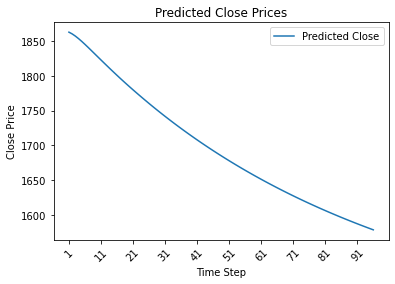

<Figure size 1080x720 with 0 Axes>

In [74]:
predicted_close = predictions[:, 3]  # Assuming "close" is the 4th column (index 3) in your data

# Generate the time steps for the predictions
time_steps = range(1, len(predicted_close) + 1)

# Plot the predicted close values
plt.plot(time_steps, predicted_close, label='Predicted Close')

# Add labels and title to the plot
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.title('Predicted Close Prices')

# Add a legend
plt.legend()

# Customize x-axis labels with time
plt.xticks(time_steps, time_steps)  # Assuming time_steps represent the time values
plt.xticks(time_steps[::10], rotation=45)  # Assuming time_steps represent the time values
# Adjust figure size
plt.figure(figsize=(15, 10))

# Display the plot
plt.show()

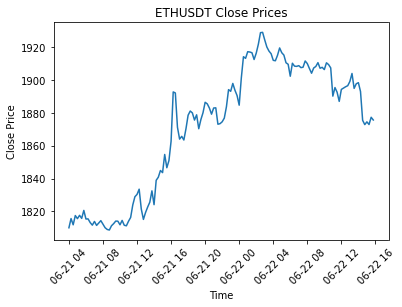

In [34]:
# Assuming you have retrieved the klines and created the DataFrame df
# Assuming you have retrieved the klines and created the DataFrame df
client = Client('dmjW0ITi9h77eMWmpVtHZRlkJZW8Pe752YcHIWOoK87AWz8Z3gV19kZ8tTnfHHcr', 'CVKE78zOoQDDqYuovQiyOVZbtf2GlgKD4jqCl3LymVXFb93Sw7FYvitOjudyThbz', tld='us')


# Calculate the start and end dates
end_date = datetime.now() - timedelta(days=1)
start_date = end_date - timedelta(days=1)
start_date = start_date.replace(hour=0, minute=0, second=0, microsecond=0)  # Set start time to 00:00:00

# Convert start and end dates to milliseconds
start_timestamp = int(start_date.timestamp() * 1000)
end_timestamp = int(end_date.timestamp() * 1000)

# Retrieve the historical data
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_15MINUTE, start_timestamp, end_timestamp)

# Convert the data to a DataFrame
df = pd.DataFrame(klines, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close'] = df['Close'].astype(float)

# Plot the close data
plt.plot(df['Open time'], df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ETHUSDT Close Prices')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [35]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2023-06-21 04:00:00,1810.54000000,1814.03000000,1807.88000000,1810.08,21.10780000,1687320899999,38188.16203900,88,0.43160000,781.71481900,0
1,2023-06-21 04:15:00,1809.97000000,1816.12000000,1809.97000000,1815.68,2.23920000,1687321799999,4061.41036200,29,2.07490000,3763.49213600,0
2,2023-06-21 04:30:00,1815.57000000,1815.96000000,1811.89000000,1811.89,3.47870000,1687322699999,6309.13147300,18,1.19010000,2159.87760400,0
3,2023-06-21 04:45:00,1813.95000000,1817.53000000,1812.73000000,1817.53,0.50690000,1687323599999,919.97150900,15,0.37170000,674.78866000,0
4,2023-06-21 05:00:00,1817.21000000,1818.74000000,1814.92000000,1815.63,3.96020000,1687324499999,7193.17448200,22,1.53190000,2785.13691300,0
